In [1]:
%%time
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
from dataclasses import dataclass
from pathlib import Path
from typing import Literal

import matplotlib.pyplot as plt
import pandas as pd
from dotenv import load_dotenv


@dataclass
class Config:
    project_dir: Path = Path("../../")
    model_dir: Path = project_dir / "models"
    outputs_dir: Path = project_dir / "outputs"
    data_dir: Path = project_dir / "data"
    results_dir: Path = project_dir / "results"
    results_agg_dir: Path = results_dir / "agg"
    results_figs_dir: Path = results_dir / "figs"
    raw_dir: Path = data_dir / "raw"
    interim_dir: Path = data_dir / "interim"
    processed_dir: Path = data_dir / "processed"


config = Config()
sys.path.append(str(config.project_dir.resolve()))
load_dotenv()

CPU times: user 395 ms, sys: 175 ms, total: 570 ms
Wall time: 1.58 s


True

In [2]:
df_orders = pd.read_csv(config.interim_dir / "olist_orders_customer_merged.csv")
df_item_products = pd.read_csv(
    config.interim_dir / "olist_item_product_seller_merged.csv"
)

In [3]:
df_orders_item_products_merged = pd.merge(
    df_orders, df_item_products, on="order_id", how="left"
)
assert (
    df_orders_item_products_merged["order_id"].nunique()
    == df_orders["order_id"].nunique()
)

# 要修正

In [ ]:
df_orders_item_products_merged[
    ["order_id", "product_id", "product_category_name_english", "order_purchase_month"]
].drop_duplicates()

## 種類

<Axes: ylabel='product_category_name_english'>

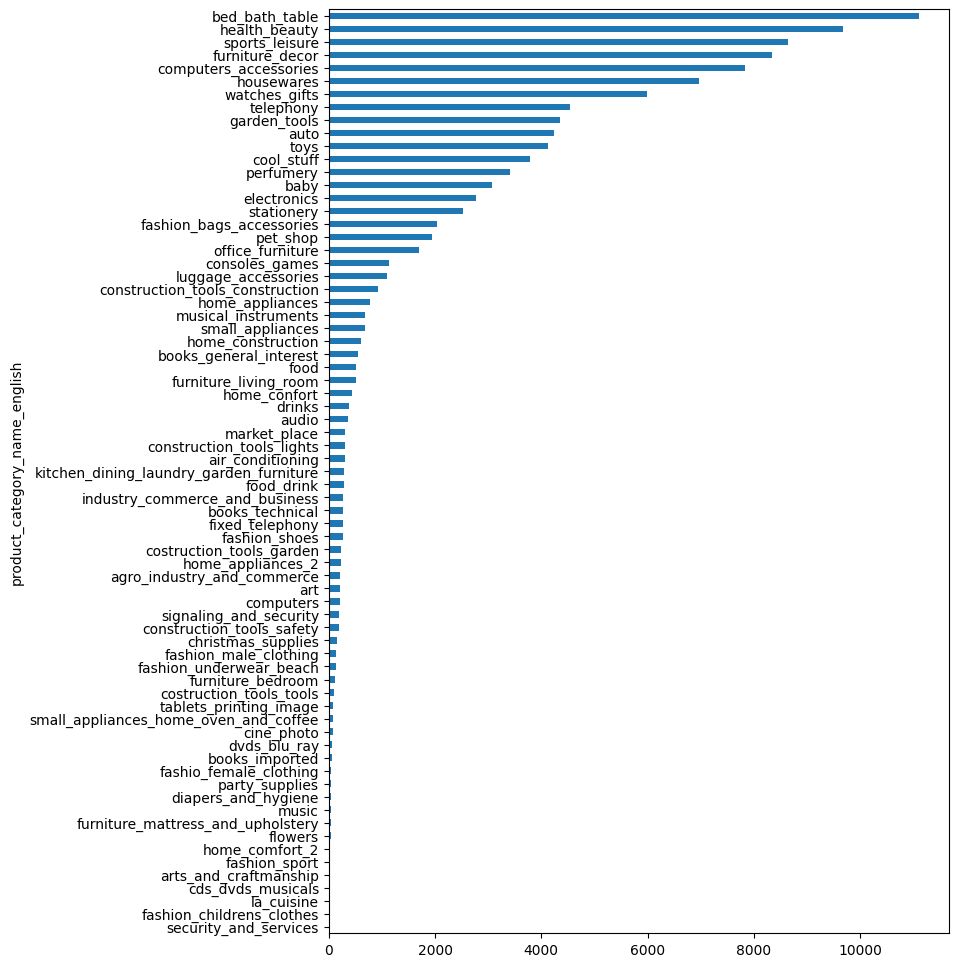

In [27]:
df_orders_item_products_merged.groupby("product_category_name_english")[
    "order_id"
].count().sort_values(ascending=True).plot(kind="barh", figsize=(8, 12))

In [218]:
# 月毎・カテゴリー別の販売個数を集計
monthly_category_counts = (
    df_orders_item_products_merged.groupby(["month", "product_category_name_english"])[
        "order_id"
    ]
    .nunique()
    .reset_index(name="count")
)

# 月毎の上位カテゴリーを抽出してランキング形式に変換
top_categories_by_month = (
    monthly_category_counts.sort_values(["month", "count"], ascending=[True, False])
    .groupby("month")
    .agg(
        {
            "product_category_name_english": lambda x: list(x)[:5],
            "count": lambda x: list(x)[:5],
        }
    )
)

# ランキング形式のDataFrameを作成
result_df = pd.DataFrame()
for i in range(5):
    result_df[f"{i + 1}"] = top_categories_by_month[
        "product_category_name_english"
    ].apply(lambda x: x[i] if i < len(x) else None)
    result_df[f"count_{i + 1}"] = top_categories_by_month["count"].apply(
        lambda x: x[i] if i < len(x) else None
    )

# インデックスを年月の文字列に変換
result_df.index = result_df.index.astype(str)

# オプション：より見やすい形式で表示（カテゴリー名と販売数を組み合わせる）
readable_df = pd.DataFrame()
for i in range(5):
    readable_df[f"{i + 1}"] = result_df.apply(
        lambda row: f"{row[f'{i + 1}']} ({row[f'count_{i + 1}']}個)"
        if pd.notna(row[f"{i + 1}"])
        else None,
        axis=1,
    )

display(readable_df)

,1,2,3,4,5
month,,,,,
2016-09,health_beauty (3個),furniture_decor (2.0個),telephony (1.0個),None,None
2016-10,furniture_decor (67個),health_beauty (48.0個),perfumery (33.0個),toys (27.0個),computers_accessories (21.0個)
2016-12,fashion_bags_accessories (1個),None,None,None,None
2017-01,furniture_decor (182個),health_beauty (85.0個),sports_leisure (80.0個),garden_tools (58.0個),bed_bath_table (48.0個)
2017-02,furniture_decor (266個),health_beauty (166.0個),bed_bath_table (165.0個),sports_leisure (156.0個),telephony (111.0個)
2017-03,furniture_decor (328個),bed_bath_table (289.0個),health_beauty (211.0個),housewares (204.0個),sports_leisure (199.0個)
2017-04,bed_bath_table (274個),sports_leisure (218.0個),furniture_decor (203.0個),health_beauty (189.0個),housewares (183.0個)
2017-05,bed_bath_table (369個),computers_accessories (320.0個),sports_leisure (316.0個),housewares (307.0個),health_beauty (290.0個)
2017-06,bed_bath_table (382個),housewares (331.0個),sports_leisure (277.0個),computers_accessories (261.0個),health_beauty (260.0個)


In [241]:
# 月毎・カテゴリー別の販売個数を集計
monthly_category_counts = (
    df_orders_item_products_merged.groupby(["month", "product_category_name_english"])[
        "order_id"
    ]
    .nunique()
    .reset_index(name="count")
)
monthly_category_pivot_counts = monthly_category_counts.pivot(
    index="month", columns="product_category_name_english", values="count"
)

# オプション：欠損値を0で埋める場合
monthly_category_pivot_counts = monthly_category_pivot_counts.fillna(0)

# オプション：インデックスをソートする場合
monthly_category_pivot_counts = monthly_category_pivot_counts.sort_index()
# 各月でのランキングを計算（値が大きい順）
monthly_category_pivot_counts_ranking = monthly_category_pivot_counts.rank(
    axis=1, ascending=False, method="min"
)
display(monthly_category_pivot_counts_ranking)
monthly_category_pivot_counts_ranking.reset_index().to_excel(
    config.results_agg_dir / "monthly_category_pivot_counts_ranking.xlsx",
    index=False,
)

product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
month,,,,,,,,,,,,,,,,,,,,,
2016-09,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0
2016-10,32.0,16.0,32.0,32.0,23.0,7.0,7.0,16.0,25.0,32.0,...,32.0,32.0,32.0,32.0,5.0,32.0,32.0,10.0,4.0,16.0
2016-12,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2017-01,29.0,28.0,44.0,44.0,44.0,9.0,7.0,4.0,29.0,44.0,...,36.0,44.0,25.0,44.0,3.0,22.0,44.0,13.0,5.0,18.0
2017-02,31.0,26.0,52.0,52.0,35.0,7.0,17.0,3.0,28.0,42.0,...,52.0,52.0,18.0,52.0,4.0,20.0,28.0,5.0,11.0,15.0
2017-03,45.0,27.0,36.0,54.0,29.0,12.0,18.0,2.0,24.0,54.0,...,54.0,50.0,22.0,54.0,5.0,16.0,36.0,6.0,11.0,12.0
2017-04,58.0,27.0,49.0,58.0,30.0,13.0,14.0,1.0,28.0,49.0,...,58.0,42.0,21.0,58.0,2.0,20.0,30.0,6.0,9.0,12.0
2017-05,43.0,36.0,35.0,53.0,29.0,13.0,14.0,1.0,27.0,59.0,...,59.0,45.0,30.0,59.0,3.0,18.0,36.0,8.0,9.0,11.0
2017-06,51.0,32.0,37.0,60.0,31.0,12.0,15.0,1.0,24.0,51.0,...,60.0,45.0,23.0,51.0,3.0,21.0,34.0,9.0,8.0,11.0


In [240]:
# 月毎・カテゴリー別の販売個数を集計
monthly_category_sales = (
    df_orders_item_products_merged.groupby(["month", "product_category_name_english"])[
        "price"
    ]
    .sum()
    .reset_index(name="sum_price")
)
monthly_category_pivot_sum_price = monthly_category_sales.pivot(
    index="month", columns="product_category_name_english", values="sum_price"
)

# オプション：欠損値を0で埋める場合
monthly_category_pivot_sum_price = monthly_category_pivot_sum_price.fillna(0)

# オプション：インデックスをソートする場合
monthly_category_pivot_sum_price = monthly_category_pivot_sum_price.sort_index()
# 各月でのランキングを計算（値が大きい順）
monthly_category_pivot_sum_price_ranking = monthly_category_pivot_sum_price.rank(
    axis=1, ascending=False, method="min"
)
display(monthly_category_pivot_sum_price_ranking)
monthly_category_pivot_sum_price_ranking.reset_index().to_excel(
    config.results_agg_dir / "monthly_category_pivot_sum_price_ranking.xlsx",
    index=False,
)

product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
month,,,,,,,,,,,,,,,,,,,,,
2016-09,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0
2016-10,32.0,9.0,32.0,32.0,25.0,8.0,10.0,22.0,27.0,32.0,...,32.0,32.0,32.0,32.0,7.0,32.0,32.0,21.0,4.0,6.0
2016-12,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2017-01,39.0,25.0,44.0,44.0,44.0,9.0,7.0,12.0,31.0,44.0,...,32.0,44.0,19.0,44.0,3.0,20.0,44.0,14.0,11.0,5.0
2017-02,42.0,20.0,52.0,52.0,43.0,6.0,21.0,4.0,29.0,48.0,...,52.0,52.0,14.0,52.0,3.0,23.0,28.0,15.0,12.0,11.0
2017-03,48.0,21.0,45.0,54.0,33.0,10.0,23.0,5.0,26.0,54.0,...,54.0,49.0,14.0,54.0,2.0,19.0,38.0,17.0,12.0,3.0
2017-04,58.0,26.0,46.0,58.0,35.0,11.0,21.0,2.0,36.0,56.0,...,58.0,45.0,4.0,58.0,1.0,19.0,33.0,15.0,13.0,3.0
2017-05,35.0,39.0,20.0,58.0,30.0,12.0,15.0,6.0,32.0,59.0,...,59.0,44.0,24.0,59.0,4.0,22.0,37.0,16.0,8.0,3.0
2017-06,31.0,26.0,41.0,60.0,30.0,6.0,15.0,3.0,28.0,53.0,...,60.0,46.0,13.0,55.0,4.0,22.0,37.0,18.0,12.0,7.0


In [13]:
def plot_category_sales_trend(
    categories: list,
    df_merged: pd.DataFrame,
    figsize: tuple = (12, 6),
    title: str = None,
    start_date: str = None,
    end_date: str = None,
    agg_type: Literal["n_sales", "rev", "uuser"] = "n_sales",
) -> None:
    """
    指定されたカテゴリーの月毎の販売個数推移をプロットする関数
    欠損している月は0として補完します

    Parameters
    ----------
    categories : list
        プロットしたい商品カテゴリーのリスト
    df_merged : pd.DataFrame
        注文データ・商品データを含むDataFrame
    df_item_products : pd.DataFrame
        商品データを含むDataFrame
    figsize : tuple, optional
        グラフのサイズ, by default (12, 6)
    title : str, optional
        グラフのタイトル, by default None
    start_date : str, optional
        集計開始日 ('YYYY-MM' 形式), by default None
    end_date : str, optional
        集計終了日 ('YYYY-MM' 形式), by default None
    agg_type: Literal, optional
        集計方法, by default n_sales
    """

    # 日付範囲の設定
    df_merged["order_purchase_timestamp"] = pd.to_datetime(
        df_merged["order_purchase_timestamp"]
    )
    df_merged["order_purchase_month"] = pd.to_datetime(
        df_merged["order_purchase_month"]
    )
    if start_date is None:
        start_date = df_merged["order_purchase_timestamp"].min()

    if end_date is None:
        end_date = df_merged["order_purchase_timestamp"].max()

    # 全ての月を含む日付範囲を作成
    all_months = df_orders_item_products_merged.query(
        "order_purchase_month >= @start_date & month <= @end_date"
    )["order_purchase_month"].unique()

    all_categories = df_merged["product_category_name_english"].unique()

    # 全ての月とカテゴリーの組み合わせを作成
    month_category_combinations = pd.MultiIndex.from_product(
        [all_months, all_categories],
        names=["order_purchase_month", "product_category_name_english"],
    )

    # 月毎・カテゴリー別の販売個数を集計し、欠損値を0で補完
    if agg_type == "sales":
        monthly_category_counts = (
            df_merged.groupby(
                ["order_purchase_month", "product_category_name_english"]
            )["order_id"]
            .nunique()
            .reindex(month_category_combinations, fill_value=0)
            .reset_index(name="sum")
            .sort_values("order_purchase_month")
        )
    elif agg_type == "rev":
        monthly_category_counts = (
            df_merged.groupby(
                ["order_purchase_month", "product_category_name_english"]
            )["price"]
            .sum()
            .reindex(month_category_combinations, fill_value=0)
            .reset_index(name="sum")
            .sort_values("order_purchase_month")
        )
    else:
        monthly_category_counts = (
            df_merged.groupby(
                ["order_purchase_month", "product_category_name_english"]
            )["customer_unique_id"]
            .nunique()
            .reindex(month_category_combinations, fill_value=0)
            .reset_index(name="sum")
            .sort_values("order_purchase_month")
        )

    # グラフのプロット
    plt.figure(figsize=figsize)

    # 各カテゴリーごとに折れ線をプロット
    for i, category in enumerate(categories):
        category_data = monthly_category_counts.query(
            "product_category_name_english == @category"
        )
        if i < 5:
            plt.plot(
                category_data["order_purchase_month"].astype(str),
                category_data["sum"],
                marker="o",
                linewidth=2,
                label=category,
            )
        elif i >= 10:
            plt.plot(
                category_data["order_purchase_month"].astype(str),
                category_data["sum"],
                marker="o",
                linewidth=2,
                label=category,
                alpha=0.3,
                color="black",
            )
        else:
            plt.plot(
                category_data["order_purchase_month"].astype(str),
                category_data["sum"],
                marker="o",
                linewidth=2,
                label=category,
                alpha=0.6,
            )
    if title is None:
        title = "Monthly Sales Volume by Categories"

    plt.title(title, pad=20, fontsize=14)
    plt.xlabel("Month", fontsize=12)
    plt.ylabel("Number of Items Sold", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    print("\nTotal sales volume by category:")
    for category in categories:
        total_sales = df_merged[
            df_merged["product_category_name_english"] == category
        ].shape[0]
        print(f"{category}: {total_sales:,} items")


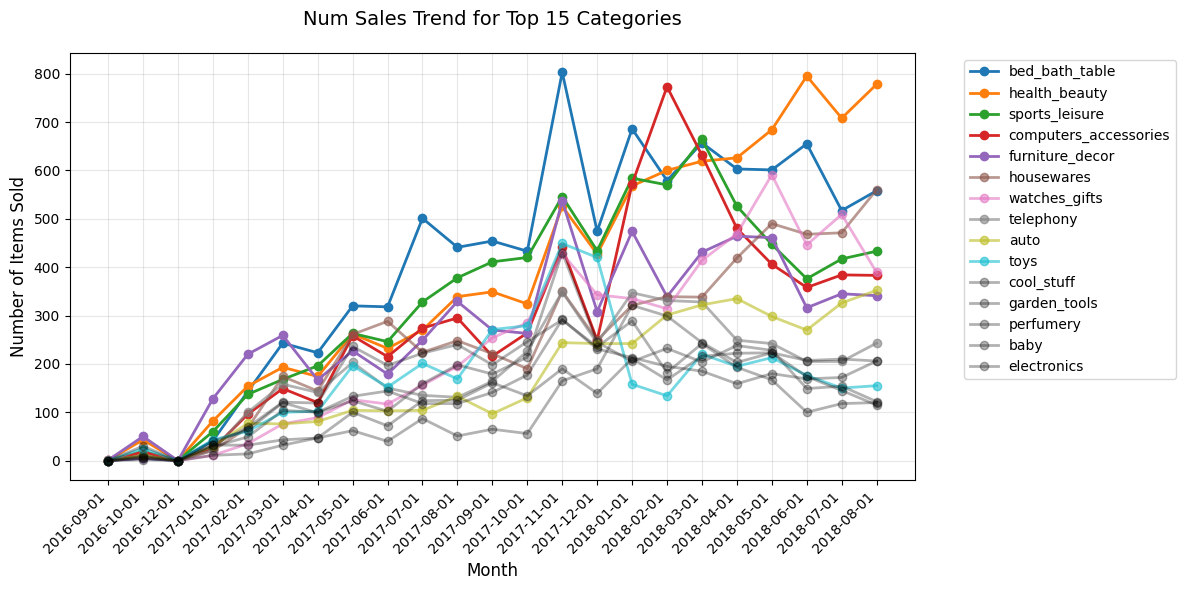


Total sales volume by category:
bed_bath_table: 11,115 items
health_beauty: 9,670 items
sports_leisure: 8,641 items
computers_accessories: 7,827 items
furniture_decor: 8,334 items
housewares: 6,964 items
watches_gifts: 5,991 items
telephony: 4,545 items
auto: 4,235 items
toys: 4,117 items
cool_stuff: 3,796 items
garden_tools: 4,347 items
perfumery: 3,419 items
baby: 3,065 items
electronics: 2,767 items


In [14]:
top_sold_item_categories = (
    df_orders_item_products_merged.groupby("product_category_name_english")["order_id"]
    .nunique()
    .sort_values(ascending=False)
    .head(15)
    .index.tolist()
)

plot_category_sales_trend(
    categories=top_sold_item_categories,
    df_merged=df_orders_item_products_merged,
    start_date="2016-09",
    end_date="2018-08",
    title="Num Sales Trend for Top 15 Categories",
    agg_type="n_sales",
)

In [ ]:
# ユーザー数はほとんどオーダー数
# top_uuser_item_categories = (
#     df_orders_item_products_merged.groupby("product_category_name_english")[
#         "customer_unique_id"
#     ]
#     .nunique()
#     .sort_values(ascending=False)
#     .head(10)
#     .index.tolist()
# )
# plot_category_sales_trend(
#     categories=top_uuser_item_categories,
#     df_merged=df_orders_item_products_merged,
#     start_date="2016-09",
#     end_date="2018-08",
#     title="Rev Trend for Top 10 Categories",
#     agg_type="rev",
# )

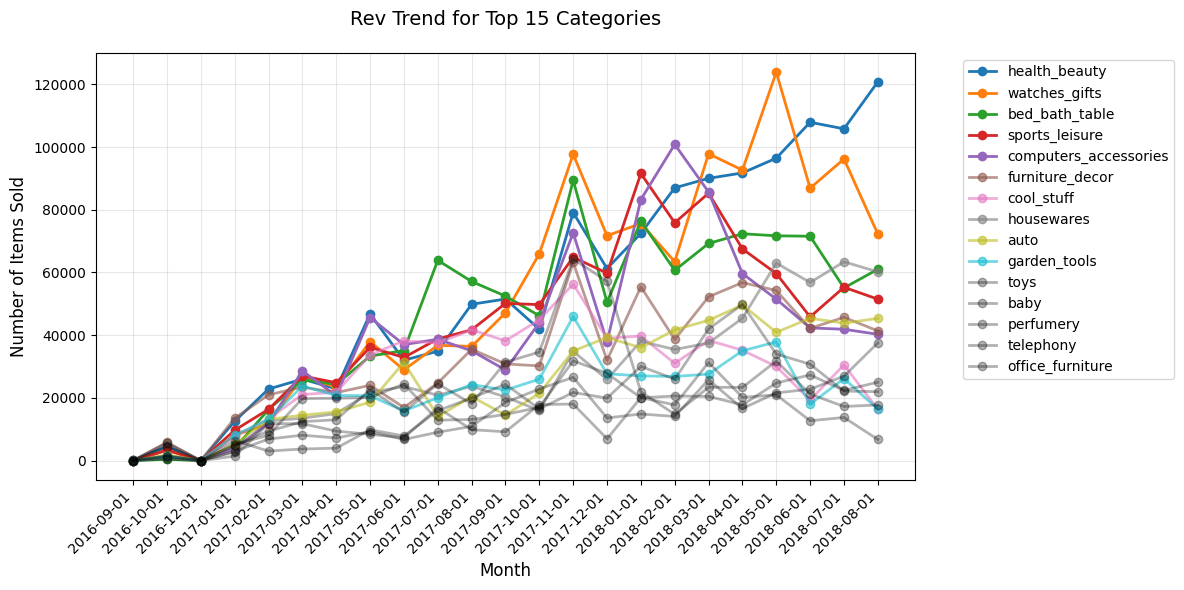


Total sales volume by category:
health_beauty: 9,670 items
watches_gifts: 5,991 items
bed_bath_table: 11,115 items
sports_leisure: 8,641 items
computers_accessories: 7,827 items
furniture_decor: 8,334 items
cool_stuff: 3,796 items
housewares: 6,964 items
auto: 4,235 items
garden_tools: 4,347 items
toys: 4,117 items
baby: 3,065 items
perfumery: 3,419 items
telephony: 4,545 items
office_furniture: 1,691 items


In [12]:
top_rev_item_categories = (
    df_orders_item_products_merged.groupby("product_category_name_english")["price"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index.tolist()
)

plot_category_sales_trend(
    categories=top_rev_item_categories,
    df_merged=df_orders_item_products_merged,
    start_date="2016-09",
    end_date="2018-08",
    title="Rev Trend for Top 15 Categories",
    agg_type="rev",
)

In [212]:
ranking_n_order_categories = (
    df_orders_item_products_merged.groupby("product_category_name_english")["order_id"]
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
    .assign(n_order_ranking=lambda x: x.index + 1)
)

ranking_n_uuser_categories = (
    df_orders_item_products_merged.groupby("product_category_name_english")[
        "customer_unique_id"
    ]
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
    .assign(n_uuser_ranking=lambda x: x.index + 1)
)

ranking_sum_price_categories = (
    df_orders_item_products_merged.groupby("product_category_name_english")["price"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .assign(sum_price_ranking=lambda x: x.index + 1)
)

ranking_mean_price_categories = (
    df_orders_item_products_merged.groupby("product_category_name_english")["price"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
    .assign(price_mean_ranking=lambda x: x.index + 1)
)
ranking_merged = (
    ranking_n_order_categories.merge(
        ranking_n_uuser_categories, on="product_category_name_english", how="left"
    )
    .merge(ranking_sum_price_categories, on="product_category_name_english", how="left")
    .merge(
        ranking_mean_price_categories, on="product_category_name_english", how="left"
    )
    .rename(
        columns={
            "order_id": "n_orders",
            "customer_unique_id": "n_users",
            "price_x": "total_price",
            "price_y": "mean_price",
        }
    )
)

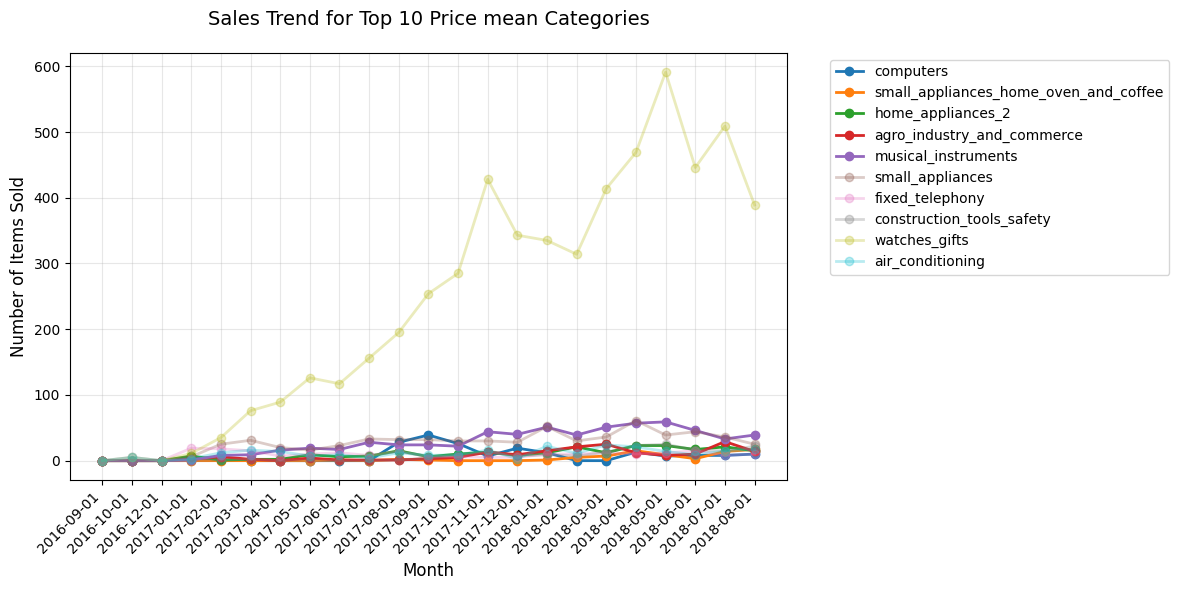


Total sales volume by category:
computers: 203 items
small_appliances_home_oven_and_coffee: 76 items
home_appliances_2: 238 items
agro_industry_and_commerce: 212 items
musical_instruments: 680 items
small_appliances: 679 items
fixed_telephony: 264 items
construction_tools_safety: 194 items
watches_gifts: 5,991 items
air_conditioning: 297 items


In [206]:
plot_category_sales_trend(
    categories=df_orders_item_products_merged.groupby("product_category_name_english")[
        "price"
    ]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist(),
    df_merged=df_orders_item_products_merged,
    start_date="2016-09",
    end_date="2018-08",
    title="Sales Trend for Top 10 Price mean Categories",
)

In [245]:
(
    df_orders_item_products_merged.groupby("product_category_name_english")["price"]
    .mean()
    .sort_values(ascending=False)
).head(20)

product_category_name_english
computers                                  1098.340542
small_appliances_home_oven_and_coffee       624.285658
home_appliances_2                           476.124958
agro_industry_and_commerce                  342.124858
musical_instruments                         281.616000
small_appliances                            280.778468
fixed_telephony                             225.693182
construction_tools_safety                   208.992371
watches_gifts                               201.135984
air_conditioning                            185.269226
furniture_bedroom                           183.750275
cool_stuff                                  167.357969
kitchen_dining_laundry_garden_furniture     164.869644
office_furniture                            162.011059
music                                       158.798684
construction_tools_construction             155.734758
costruction_tools_tools                     154.407282
industry_commerce_and_business     

### 半年ごとの商品別売上伸び率


In [15]:
df_orders_item_products_merged["order_purchase_timestamp"] = pd.to_datetime(
    df_orders_item_products_merged["order_purchase_timestamp"]
)
df_orders_item_products_merged["month"] = pd.to_datetime(
    df_orders_item_products_merged["month"]
)
start_date = df_orders_item_products_merged["order_purchase_timestamp"].min()
end_date = df_orders_item_products_merged["order_purchase_timestamp"].max()
all_months = df_orders_item_products_merged.query(
    "month >= @start_date & month <= @end_date"
)["month"].unique()

all_categories = df_orders_item_products_merged[
    "product_category_name_english"
].unique()
month_category_combinations = pd.MultiIndex.from_product(
    [all_months, all_categories], names=["month", "product_category_name_english"]
)
monthly_category_counts = (
    df_orders_item_products_merged.groupby(["month", "product_category_name_english"])[
        "price"
    ]
    .sum()
    .reindex(month_category_combinations, fill_value=0)
    .reset_index(name="sum")
    .sort_values("month")
)


In [21]:
pd.pivot_table(
    monthly_category_counts,
    columns="month",
    index="product_category_name_english",
    values="sum",
)

month,2016-10-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,...,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01
product_category_name_english,,,,,,,,,,,,,,,,,,,,,
agro_industry_and_commerce,0.00,0.0,65.97,224.84,81.99,0.00,1579.94,1390.00,1180.00,88.00,...,5853.44,7404.80,6019.00,4500.70,3279.75,3515.80,7756.69,5021.09,0.0,0.0
air_conditioning,1707.09,0.0,663.70,3095.30,4103.81,2582.23,1016.77,2084.48,1396.10,4271.73,...,4674.74,2626.89,2667.58,3261.79,2051.20,3567.90,2657.86,3556.90,0.0,0.0
art,0.00,0.0,0.00,0.00,223.25,119.90,6967.65,421.70,386.75,244.70,...,2540.77,1251.71,461.50,2140.28,2691.86,2500.14,1843.20,1481.39,0.0,0.0
arts_and_craftmanship,0.00,0.0,0.00,0.00,0.00,0.00,21.99,0.00,129.90,0.00,...,0.00,0.00,0.00,15.99,89.80,0.00,654.57,901.76,0.0,0.0
audio,156.99,0.0,0.00,163.80,1134.77,942.20,2081.18,1671.00,771.69,1050.70,...,3820.28,2828.49,10606.69,7045.07,2697.68,1830.69,2062.64,2069.40,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stationery,0.00,0.0,1561.99,2341.40,5902.62,4606.34,6049.98,3493.57,7091.75,6366.91,...,41023.91,11889.10,13152.74,11701.35,12923.39,12859.08,17247.09,15563.65,0.0,0.0
tablets_printing_image,0.00,0.0,0.00,792.00,495.00,1112.88,1514.98,594.00,198.00,450.89,...,161.80,694.97,259.29,52.00,49.90,50.00,0.00,0.00,0.0,0.0
telephony,500.08,0.0,2945.86,6899.09,8121.05,7245.87,9264.10,6757.62,9064.86,10930.29,...,14879.96,14105.24,25804.89,16636.84,21608.26,22776.82,26939.41,37541.89,0.0,0.0


## 都市

In [28]:
df_orders_item_products_merged.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'approved_span', 'order_delivered_customer_date_span', 'is_delayed',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'sum_price_freight_by_order', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')

<Axes: ylabel='customer_state'>

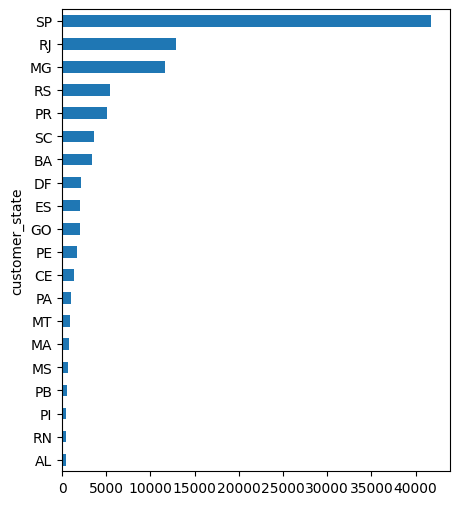

In [37]:
df_orders_item_products_merged.groupby("customer_state")[
    "order_id"
].nunique().sort_values(ascending=False).head(20).sort_values(ascending=True).plot(
    kind="barh", figsize=(5, 6)
)

<Axes: ylabel='seller_state'>

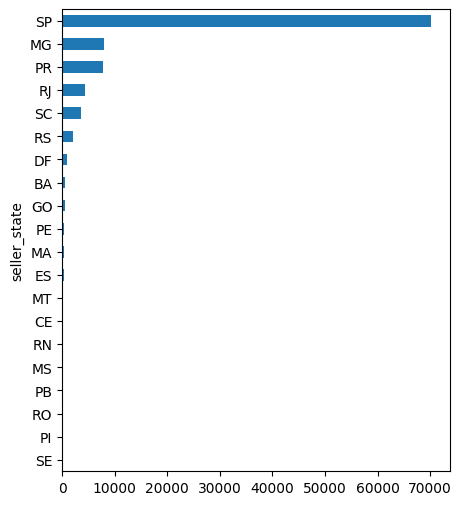

In [39]:
df_orders_item_products_merged.groupby("seller_state")[
    "order_id"
].nunique().sort_values(ascending=False).head(20).sort_values(ascending=True).plot(
    kind="barh", figsize=(5, 6)
)